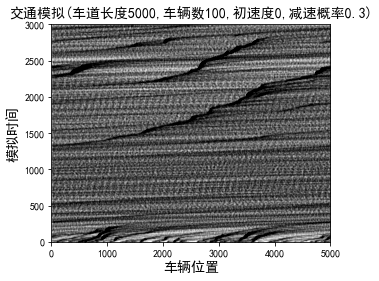

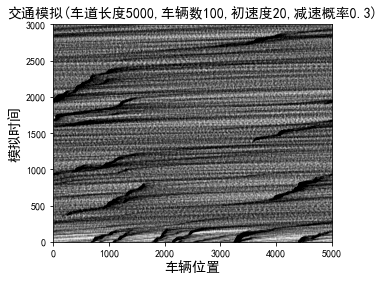

KeyboardInterrupt: 

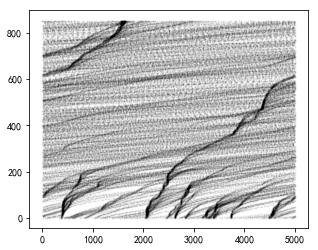

In [1]:
#  http://blog.sina.com.cn/s/blog_44befaf60102wm7l.html

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

np.random.seed(0)

def go(path=5000,n=100,v0=60,ltv=120,p=0.3,times=3000):
    
    '''
    path = 5000.0 # 道路长度
    n = 100 # 车辆数目
    v0 = 60 # 初始速度
    ltv = 150 # 最大限速
    p = 0.3 # 减速概率
    times = 3000 # 模拟的时刻数目
    '''
    
    # x保存每辆车在道路上的位置，随机初始化
    x = np.random.rand(n) * path
    x.sort()
    # v保存每辆车的速度，初速度相同
    v = np.ones(n) * v0
    
    plt.figure(figsize=(5,4),facecolor='w')
    # 模拟每个时刻
    for t in range(times):
        plt.scatter(x, [t]*n, s=1, c='k',alpha=0.05)
        # 模拟每辆车
        for i in range(n):
            # 计算当前车与前车的距离，注意是环形车道
            if x[(i+1)%n] > x[i]:
                d = x[(i+1)%n] - x[i] 
            else:
                d = path - x[i] + x[(i+1)%n]
            # 根据距离计算下一秒的速度
            if v[i] < d:
                if np.random.rand() > p:
                    v[i] += 1
                else:
                    v[i] -= 1
            else:
                v[i]  = d-1
        # 对速度进行限制      
        v = v.clip(0,ltv)    
        # ！！！一秒后，车辆的位置发生了变化
        x += v
        # 注意是环形车道
        x = x % path
    # 画图        
    plt.xlim(0,path)
    plt.ylim(0,times)
    plt.xlabel('车辆位置', fontsize=14)
    plt.ylabel('模拟时间', fontsize=14)
    plt.title('交通模拟(车道长度%d,车辆数%d,初速度%s,减速概率%s)' % (path,n,v0,p), fontsize=14)
    #plt.tight_layout(pad=2)
    plt.show()

if __name__ == '__main__':
    go(v0=0)
    go(v0=20)
    go(v0=40)
    go(v0=60)
    
    go(p=0.0)
    go(p=0.1)
    go(p=0.3)
    go(p=0.5)
    go(p=0.8)